In [ ]:
"""
-------------------------------------------------------------------------------------------------------------------
# m4D2 design on Raven
# Establish alphafold3
# make cst file optional in MDMin!
# Establish Rosetta w/o constraint!
# Establish biodc
# Establish ligandmpnn
---------------------------------------------------------------------------------------------------------------------

LAST CHANGE: Removing cst from RosettaRelax

""" 
import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *

# GENERAL SETTINGS FOR AI.zymes ---------------------------------------------------------------------------------------
AIzymes = AIzymes_MAIN()
AIzymes.setup(FOLDER_HOME = 'RELAX_m4d2_RAVEN',
  FOLDER_PARENT     = 'parent',
  MAX_JOBS          = 18,  #72
  MAX_GPUS          = 0,   #4
  MEMORY            = 100, #512
  N_PARENT_JOBS     = 18,
  MAX_DESIGNS       = 1000, #1000
  KBT_BOLTZMANN     = [0.5, 0.0003],
  WT                = "m4d2",
  LIGAND            = "HEM",
  DESIGN            = "13,16,17,20,21,23,24,28,34,37,38,41,44,71,74,75,78,79,81,82,92,93,95,96,99,102",
  SYSTEM            = "RAVEN",
  EXPLORE           = True,
  RUN_PARALLEL      = True,
  SUBMIT_PREFIX     = "rel", 
  PARENT_DES_MED    = ['RosettaDesign','RosettaRelax','MDMin','BioDC'],
  DESIGN_METHODS    = [[0.7,'LigandMPNN','AlphaFold3MSA','AlphaFold3INF','MDMin','RosettaRelax','BioDC'],\
                       [0.3,'SolubleMPNN','AlphaFold3MSA','AlphaFold3INF','MDMin','RosettaRelax','BioDC']],
  SCORING_METHODS   = [], 
  SELECTED_SCORES   = ["total","interface","redoxpotential"],  
 )

2025-03-08 10:06:41 - INFO - Job will be run in PARALLEL mode with 18 cpus. It is recommended to set N_PARENT_JOBS to at least 36.
2025-03-08 10:06:41 - INFO - Add a chheck here for GPU request, failing if GPUs are requested wrongly!


In [ ]:
import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *
AIzymes = AIzymes_MAIN()
AIzymes.initialize(FOLDER_HOME = 'RELAX_m4d2_RAVEN', LOG="debug", PRINT_VAR=False) 
AIzymes.submit_controller()

In [ ]:
!squeue --me  
!scancel 16104684                                                                                                                                                             

In [19]:
!tail -n 50 RELAX_m4d2_RAVEN/controller.log

2025-03-08 10:02:48 - DEBUG - Starting calculation based on /raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/11/m4d2_RosettaDesign_11
2025-03-08 10:02:48 - DEBUG - Resulting in variant /raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/11/m4d2_RosettaDesign_11
2025-03-08 10:02:48 - INFO - Run RosettaRelax for index 11.
2025-03-08 10:02:48 - DEBUG - Job started with /raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/11/scripts/submit_RosettaRelax_11.sh
2025-03-08 10:02:48 - DEBUG - 13 parallel jobs.
2025-03-08 10:02:48 - DEBUG - Updating scores
2025-03-08 10:02:48 - DEBUG - Starting new calculation for index 12.
2025-03-08 10:02:48 - DEBUG - Starting calculation based on /raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/12/m4d2_RosettaDesign_12
2025-03-08 10:02:48 - DEBUG - Resulting in variant /raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/12/m4d2_RosettaDesign_12
2025-03-08 10:02:48 - INFO - Run RosettaRelax for index 12.
2025-03-08 10:02:48 - DEBUG - Job started

In [6]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 4)  
file_path = "RELAX_m4d2_RAVEN/all_scores.csv"
df = pd.read_csv(file_path)
display(df)
display(df[df["total_score"].isna()])

index=0
print()
pd.set_option("display.max_rows", None)
display(df.iloc[index])
pd.set_option("display.max_rows", 4)

print()
print("All Designs:             ",len(df))
print("Designs with total_score:",df["total_score"].notna().sum())

,sequence,parent_index,generation,total_mutations,parent_mutations,score_taken_from,design_method,blocked,next_steps,final_variant,input_variant,step_input_variant,step_output_variant,total_potential,total_score,design_total_score,relax_total_score,interface_potential,interface_score,design_interface_score,relax_interface_score,redoxpotential_potential,redoxpotential_score,design_redoxpotential_score,relax_redoxpotential_score,kbt_boltzmann,cst_weight,luca,cat_resi
0,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/0/m4d2_RosettaRelax_0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/0/m4d2_RosettaDesign_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN
1,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/1/m4d2_RosettaRelax_1,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/1/m4d2_RosettaDesign_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/16/m4d2_RosettaRelax_16,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/16/m4d2_RosettaDesign_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN
17,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/17/m4d2_RosettaRelax_17,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/17/m4d2_RosettaDesign_17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN


,sequence,parent_index,generation,total_mutations,parent_mutations,score_taken_from,design_method,blocked,next_steps,final_variant,input_variant,step_input_variant,step_output_variant,total_potential,total_score,design_total_score,relax_total_score,interface_potential,interface_score,design_interface_score,relax_interface_score,redoxpotential_potential,redoxpotential_score,design_redoxpotential_score,relax_redoxpotential_score,kbt_boltzmann,cst_weight,luca,cat_resi
0,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/0/m4d2_RosettaRelax_0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/0/m4d2_RosettaDesign_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN
1,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/1/m4d2_RosettaRelax_1,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/1/m4d2_RosettaDesign_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/16/m4d2_RosettaRelax_16,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/16/m4d2_RosettaDesign_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN
17,NaN,Parent,0,NaN,NaN,NaN,RosettaDesign,unblocked,"RosettaDesign,RosettaRelax,BioDC",/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/17/m4d2_RosettaRelax_17,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/17/m4d2_RosettaDesign_17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,1.0,/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN/parent/m4d2,NaN


sequence                                                                                                NaN
parent_index                                                                                         Parent
generation                                                                                                0
total_mutations                                                                                         NaN
parent_mutations                                                                                        NaN
score_taken_from                                                                                        NaN
design_method                                                                                 RosettaDesign
blocked                                                                                           unblocked
next_steps                                                                 RosettaDesign,RosettaRelax,BioDC
final_variant               


All Designs:              18
Designs with total_score: 0


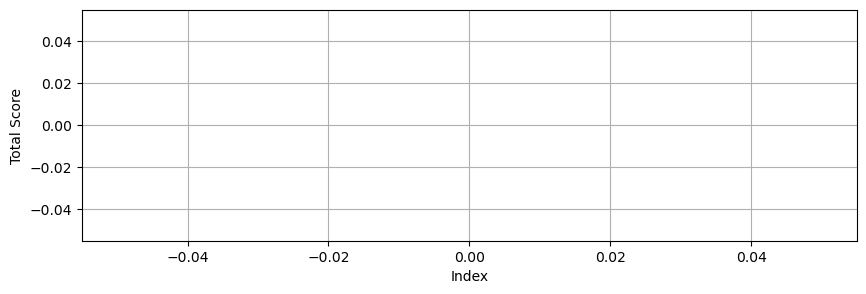

In [8]:
import matplotlib.pyplot as plt

# Filter out NaN values
df_filtered = df.dropna(subset=["total_score"])

# Plot total_score against index
plt.figure(figsize=(10, 3))
plt.plot(df_filtered.index, -df_filtered["total_score"], marker='o', linestyle='-', alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Total Score")
plt.grid(True)
plt.show()

ERROR: plot_scores_df does not contain enough data
Empty DataFrame
Columns: [sequence, parent_index, generation, total_mutations, parent_mutations, score_taken_from, design_method, blocked, next_steps, final_variant, input_variant, step_input_variant, step_output_variant, total_potential, total_score, design_total_score, relax_total_score, interface_potential, interface_score, design_interface_score, relax_interface_score, redoxpotential_potential, redoxpotential_score, design_redoxpotential_score, relax_redoxpotential_score, kbt_boltzmann, cst_weight, luca, cat_resi, identical_score, identical_potential]
Index: []


ValueError: cannot convert float NaN to integer

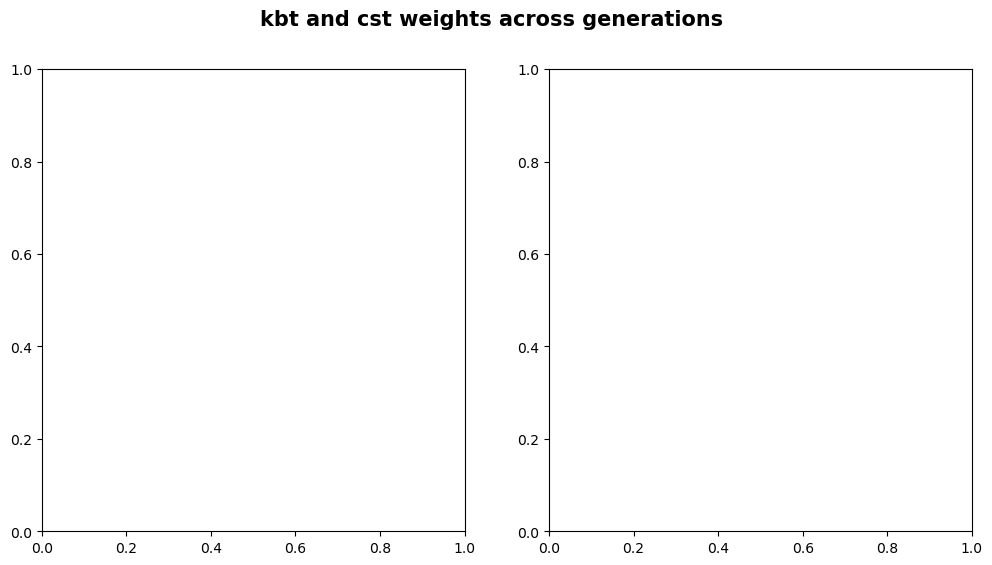

In [10]:
import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *
AIzymes = AIzymes_MAIN()
AIzymes.initialize(FOLDER_HOME = 'RELAX_m4d2_RAVEN', LOG="info", PRINT_VAR=False) #LOG="debug/info"
AIzymes.plot(tree_plot=False, landscape_plot=False)

In [ ]:
!tail -n 200 TEST_RAVEN/controller.log	 
#!cat TEST_RAVEN/controller.log	

In [ ]:
import re
FOLDER_HOME='/raven/u/bunzela/AIzymes/design/TEST/RELAX_m4d2_RAVEN'
index=26
job="ESMfold"

with open(f'{FOLDER_HOME}/{index}/scripts/{job}_{index}.sh', "r") as f: script = f.read()
match = re.search(r'CUDA_VISIBLE_DEVICES\s*=\s*([0-9]+)', script)

print(script)

if match: 
    gpu = int(match.group(1))
    print(gpu)
    self.gpus[gpu] = process 
    logging.debug(f'XXXXXXXXXx {script} {free_gpu} helper_002')  
